# <a>Aprendizado Não Supervisionado: Clusterização (K-Means)</a>

Projeto realizado durante a Jornada Cientista de Dados da Equipe Let's Data

# <a>Motivação</a>

Quando sabemos o que precisamos prever, ou seja, quando temos uma base de dados que nos fornece um norte para a criação dos modelos preditivos, utilizamos as técnicas de Aprendizado Supervisionado. Porém, nem sempre nós sabemos de antemão o que procurar, para esses casos utilizaremos técnicas de Aprendizado Não Supervisionado como a <b>Clusterização</b>.

# <a>Objeto de Estudo</a>

Para uma campanha de marketing voltada ao lançamento de uma Microvan, tivemos diversas respostas a um questionário de 30 perguntas. Porém, para identificar o público-alvo, 30 perguntas configuram em muitas features. Vamos primeiro fazer a segmentação dos clientes em 5 grupos, e depois aplicar o K-Means para fazer a clusterização.

In [1]:
# Importando as bibliotecas necessárias:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Fazendo as configurações básicas no pandas:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Importando a base de dados:
df_microvan = pd.read_csv('C:\\data_science\\projeto-clusterizacao\\microvan.csv')
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [3]:
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
# Colocando todas as informações das features (questões) em um dicionário:
# Isso facilitará a pesquisa de cada questão

dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'

In [5]:
df_microvan.shape

(400, 38)

In [6]:
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wn

Temos que todas nossas variáveis são numéricas, e não existem valores nulos. Logo, não é necessário codificação de features e nem tratamento de missing data.

# <a>Redução de Dimensionalidade - PCA</a>

Temos 30 perguntas, o que seria tranquilo se fossemos aplicar um modelo preditivo, porém queremos segmentar nossos clientes para aplicar diferentes técnicas de marketing para cada grupo. Logo precisamos reduzir essa dimensionalidade, sem perda de muita informação, para tentar encontrar o público alvo para a microvan.

In [7]:
# Importando o PCA:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [8]:
# Removendo as colunas demográficas e a mvliking:
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']
df_microvan_2 = df_microvan.drop(colunas_demograficas, axis=1)

#Testando o nº de componentes e calculando a variância explicada de cada um:
for numero_componentes in range(1,10):
    # Classe PCA passando o nº de componentes e o df que será reduzido
    pca = PCA(n_components=numero_componentes, random_state=42).fit(df_microvan_2)
    print(f'{numero_componentes} componentes com variância: soma de {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')

1 componentes com variância: soma de 0.2769670987967246: [0.2769671]
2 componentes com variância: soma de 0.44457677500174775: [0.2769671  0.16760968]
3 componentes com variância: soma de 0.5459459552274872: [0.2769671  0.16760968 0.10136918]
4 componentes com variância: soma de 0.6342464490894245: [0.2769671  0.16760968 0.10136918 0.08830049]
5 componentes com variância: soma de 0.6949209280291697: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 componentes com variância: soma de 0.7163695796236543: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 componentes com variância: soma de 0.7356422840632019: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 componentes com variância: soma de 0.7538737884378811: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 componentes com variância: soma de 0.7715039823284864: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.019

A intenção é escolher o menor número possível que ainda tenha um ganho considerável de variância explicada. Vamos então trabalhar com <b>5 componentes</b> principais.

In [9]:
# Escolhendo 5 componentes principais:
pca = PCA(n_components=5, random_state=42).fit(df_microvan_2)

print(f'Com 5 Componentes Principais temos {sum(pca.explained_variance_ratio_)*100} da variância explicada')

Com 5 Componentes Principais temos 69.49209280291697 da variância explicada


# <a>Análise dos Componentes</a>

Cada componente é criado com base nas variáveis originais. Mas como saber o impacto de cada variável na projeção final? Existe um atributo no objeto PCA que mostra esses valores.

In [10]:
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

Essa sopa de números é a composição de cada componentes com relação às variáveis originais. Vamos identificar os pesos de cada feature na composição dos componentes de forma gráfica.

In [11]:
df_composicao_componentes = pd.DataFrame(columns=df_microvan_2.columns)

for i in range(5):
    df_composicao_componentes.loc[i] = pca.components_[i]

df_composicao_componentes

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


Onde cada linha representa um dos componentes principais, e cada coluna representa quanto cada feature original influenciou na construção desse componente!

In [12]:
# Identificando o componente de maior, e o de menor, impacto em cada Componente:

for i in range(5):
    coluna_maior = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmax()]
    coluna_menor = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmin()]
    
    print(f'Componente {i+1} impacto positivo: "{dicionario_dados[coluna_maior]}" e impacto negativo: "{dicionario_dados[coluna_menor]}"\n\n')

Componente 1 impacto positivo: "Temos cuidado com o dinheiro" e impacto negativo: "Tentamos tirar o máximo de férias possível"


Componente 2 impacto positivo: "Meu próximo carro será um de dois lugares" e impacto negativo: "As minivans atuais são simplesmente muito quadradas e grandes"


Componente 3 impacto positivo: "Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias" e impacto negativo: "Não fazemos viagens com a família"


Componente 4 impacto positivo: "O desempenho é muito importante em um carro" e impacto negativo: "A segurança do automóvel é muito importante para mim"


Componente 5 impacto positivo: "Os preços dos automóveis refletem fortemente a qualidade de produção subjacente" e impacto negativo: "Acho que todo mundo deveria pegar carona ou usar transporte público"




# <a>Análise Gráfica da construção dos componentes</a>

<Axes: >

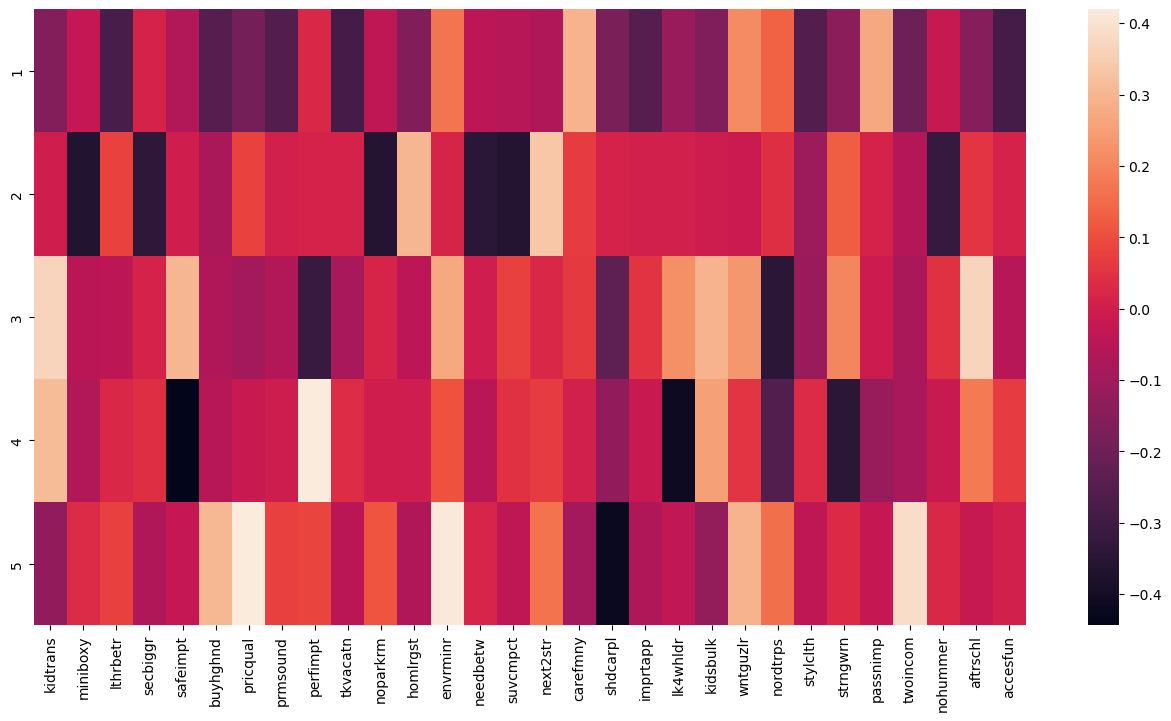

In [13]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(data=df_composicao_componentes, yticklabels=df_composicao_componentes.index+1)

Podemos verificar mais facilmente a influencia de cada feature nos componentes principais. Quanto mais claro, maior a influencia, e quanto mais escuro menor a influência.

Podemos perceber que cada componente tem influencias diferentes, o que é ideal, já que se tivessemos componentes semelhantes não justificaria precisarmos de 5.

Para facilitar o entendimento vamos criar nomes para o componentes principais com base nas características que mais influenciam a sua composição:

- Componente 1: <b>Preço baixo</b>
- Componente 2: <b>Carros compactos</b>
- Componente 3: <b>Carros para toda a família</b>
- Componente 4: <b>Velocidade</b>
- Componente 5: <b>Preço e qualidade elevados</b>

Dar nome facilita a reconhecer as características dos componentes para embasar a estratégia de marketing a ser utilizada para cada público. De que adianta por exemplo eu tentar vender um carro esportivo para alguém do grupo 3, devo focar essa publicidade nos grupos 4 e 5.

In [14]:
# Transformando o DataFrame original com os componentes principais criados:
componentes_principais_microvan = pca.transform(df_microvan_2)
componentes_principais_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

# <a>Segmentação de Clientes</a>

Já temos os 5 componentes principais criados com o PCA, vamos agora segmentá-ls e avaliar quais clusters serão utilizados. A clusterização é uma maneira de se agrupar observações que possuem características semelhantes. É diferente do PCA que busca reduzir a dimensionalidade.

Logo, PCA reduz o número de features, enquanto a Clusterização agrupa as linhas (observações) cujas features tem valores (distância) parecidos.

Aplicamos o PCA primeiro pois clusterizar 30 features é mais complicado do que apenas 5.

In [15]:
# Passando o nome dos componentes para os dados:
nomes_componentes = ['preco_baixo', 'carros_compactos', 'carros_familia', 'velocidade', 'alto_custo_alta_qualidade']

df_componentes_principais_microvan = pd.DataFrame(componentes_principais_microvan, columns = nomes_componentes, index=df_microvan.index)
df_componentes_principais_microvan.head()

,preco_baixo,carros_compactos,carros_familia,velocidade,alto_custo_alta_qualidade
subjnumb,,,,,
1,4.96,-0.63,0.25,4.53,0.48
2,-0.43,-4.58,-2.68,-2.62,-0.50
3,-4.20,6.00,2.46,1.55,-2.41
4,4.89,-0.93,-0.76,-3.58,3.52
5,0.12,5.55,-1.02,0.07,-0.84


In [16]:
# Unindo ao database original:
df_completo = pd.concat([df_microvan.loc[:, colunas_demograficas], df_componentes_principais_microvan], axis=1)
df_completo.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,preco_baixo,carros_compactos,carros_familia,velocidade,alto_custo_alta_qualidade
subjnumb,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84


C:\Users\rhyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rhyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

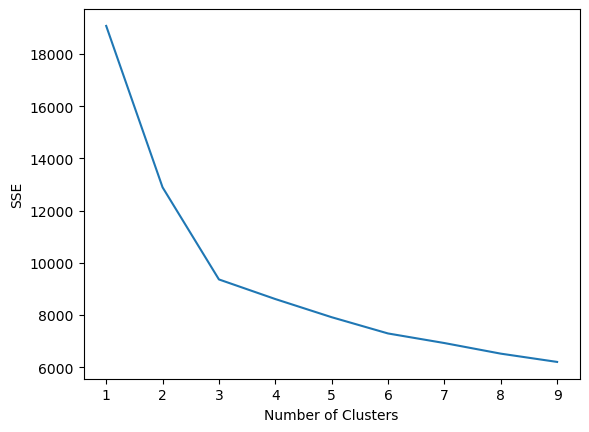

In [18]:
# Agora que temos o DataFrame completo vamos criar os clusters:
from sklearn.cluster import KMeans

# Utilizando a métrica SSE que calcula a soma do quadrado da distância de cada ponto ao centroide
# Logo, quanto mais espalhado os clusters estiverem, maior será o erro
sse = {}

# Utilizando o gráfico de cotovelo, com o SSE variando de 1 a 9 clusters:
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, ).fit(df_completo.loc[:, nomes_componentes])
    
    # Incluindo a informação de qual cluster cada observação pertence:
    df_completo["clusters"] = kmeans.labels_
    
    # Intertia: soma das distâncias entre as observações e o centro do seu cluster
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Percebe-se que a partir de 3 clusters não temos um ganho de erro significativo. Logo iremos trabalhar com <b> 3 Clusters </b>.

In [19]:
kmeans = KMeans(n_clusters=3, max_iter=1000, ).fit(df_completo.loc[:, nomes_componentes])

# Incluindo a informação de qual cluster cada observação pertence:
df_completo["clusters"] = kmeans.labels_
df_completo.head()

C:\Users\rhyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rhyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,age,income,miles,numkids,female,educ,recycle,mvliking,preco_baixo,carros_compactos,carros_familia,velocidade,alto_custo_alta_qualidade,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48,0
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50,1
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,2
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52,0
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84,2


In [20]:
# Onde ficaram os centroides:
kmeans.cluster_centers_

array([[ 4.82314353, -0.17359036,  0.26109089, -0.08413115, -0.03966391],
       [-3.48118288, -3.8798836 ,  0.00749716, -0.0107765 , -0.06933625],
       [-2.9090777 ,  3.7602181 , -0.33631449,  0.11600119,  0.11333516]])

In [21]:
# Agrupando nossos clientes com base nos Principais Componentes:
df_centroides = pd.DataFrame(data=kmeans.cluster_centers_, columns=nomes_componentes)
df_centroides

,preco_baixo,carros_compactos,carros_familia,velocidade,alto_custo_alta_qualidade
0,4.82,-0.17,0.26,-0.08,-0.04
1,-3.48,-3.88,0.01,-0.01,-0.07
2,-2.91,3.76,-0.34,0.12,0.11


Percebemos alguns detalhes sobre o agrupamento dos clusters:

- No Cluster 0 temos clientes que podem ter uma preferência por carros baratos
- No Cluster 1 temos clientes que podem ter uma repulsa por carros baratos e carros compactos
- No Cluster 2 temos clientes que podem ter uma preferência por carros compactos, porém uma repulsa por carros baratos

In [23]:
# Contando quantas observações temos em cada cluster:
df_completo['clusters'].value_counts()

0    159
2    126
1    115
Name: clusters, dtype: int64

<b>Fazendo uma rápida Análise Estatística:</b>

In [25]:
df_cluster0 = df_completo.loc[df_completo['clusters'] == 0]

In [26]:
df_cluster0.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,preco_baixo,carros_compactos,carros_familia,velocidade,alto_custo_alta_qualidade,clusters
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,32.15,36.65,14.61,0.67,0.48,2.05,2.99,3.91,4.82,-0.17,0.26,-0.08,-0.04,0.00
std,5.30,16.33,3.56,0.76,0.50,0.77,1.13,2.48,1.90,1.77,2.54,2.47,2.17,0.00
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,1.20,-5.24,-5.78,-5.29,-5.83,0.00
25%,28.00,25.00,12.00,0.00,0.00,1.00,2.00,2.00,3.52,-1.24,-1.47,-1.79,-1.50,0.00
50%,32.00,32.00,15.00,1.00,0.00,2.00,3.00,4.00,4.60,-0.32,0.27,-0.22,-0.07,0.00
75%,36.00,45.00,17.00,1.00,1.00,3.00,4.00,6.00,5.97,1.06,2.05,1.45,1.51,0.00
max,48.00,131.00,24.00,4.00,1.00,3.00,5.00,9.00,10.33,4.33,6.87,5.90,5.45,0.00


In [27]:
df_cluster1 = df_completo.loc[df_completo['clusters'] == 1]

In [28]:
df_cluster1.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,preco_baixo,carros_compactos,carros_familia,velocidade,alto_custo_alta_qualidade,clusters
count,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00
mean,44.44,83.99,22.33,1.98,0.59,3.34,3.07,6.65,-3.48,-3.88,0.01,-0.01,-0.07,1.00
std,5.76,33.43,4.04,1.11,0.49,0.66,1.24,2.22,1.96,1.60,2.76,2.53,1.93,0.00
min,31.00,28.00,14.00,0.00,0.00,2.00,1.00,1.00,-9.12,-7.18,-6.66,-7.18,-4.86,1.00
25%,40.50,59.50,19.00,1.00,0.00,3.00,2.00,5.00,-4.79,-5.17,-1.79,-1.63,-1.47,1.00
50%,44.00,79.00,22.00,2.00,1.00,3.00,3.00,7.00,-3.33,-3.89,-0.07,-0.00,-0.13,1.00
75%,48.00,108.50,25.50,3.00,1.00,4.00,4.00,9.00,-2.09,-2.81,2.04,1.41,1.05,1.00
max,58.00,168.00,32.00,4.00,1.00,4.00,5.00,9.00,0.72,-0.04,7.07,6.62,5.26,1.00


In [29]:
df_cluster2 = df_completo.loc[df_completo['clusters'] == 2]

In [30]:
df_cluster2.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,preco_baixo,carros_compactos,carros_familia,velocidade,alto_custo_alta_qualidade,clusters
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,46.02,103.37,18.46,1.21,0.56,3.27,3.08,4.37,-2.91,3.76,-0.34,0.12,0.11,2.00
std,5.96,43.73,3.55,0.99,0.50,0.65,1.18,2.54,1.86,1.54,2.65,2.41,2.00,0.00
min,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,-7.44,0.01,-6.20,-6.34,-4.31,2.00
25%,42.00,73.00,16.00,0.25,0.00,3.00,2.00,2.00,-4.16,2.79,-2.32,-1.63,-1.28,2.00
50%,46.00,94.50,18.00,1.00,1.00,3.00,3.00,4.00,-2.67,3.68,-0.13,0.27,-0.03,2.00
75%,51.00,126.00,21.00,2.00,1.00,4.00,4.00,6.00,-1.75,4.75,1.47,1.54,1.26,2.00
max,60.00,273.00,27.00,4.00,1.00,4.00,5.00,9.00,1.28,8.46,5.46,7.34,6.33,2.00


Alguns detalhes relevantes:

- No cluster 0 temos uma média de income (renda) significativamente menor que nos clusters 1 e 2, o que explica a preferência destes por carros baratos
- No cluster 2 temos a maior média de renda, o que explica porque eles não se importam muito com carros baratos
- As demais features não apresentaram muitas mudanças que pudessem nos ajudar a explicar a organização dos clusters